# Exercise 4

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_curve, roc_auc_score

In this exercise you will go through the typical machine learning workflow to fit a logistic regression model to the [Hepatitis](https://archive.ics.uci.edu/dataset/46/hepatitis) dataset. This dataset is small and unbalanced. It consists of 19 input categorical and numerical features, some of which contain missing values. 

The dateset contains the following columns:

```
     1. Class: DIE, LIVE
     2. AGE: 10, 20, 30, 40, 50, 60, 70, 80              (Numerical)
     3. SEX: male, female                                (Categorical)
     4. STEROID: no, yes                                 (Categorical)
     5. ANTIVIRALS: no, yes                              (Categorical)
     6. FATIGUE: no, yes                                 (Categorical)
     7. MALAISE: no, yes                                 (Categorical)
     8. ANOREXIA: no, yes                                (Categorical)
     9. LIVER BIG: no, yes                               (Categorical)
    10. LIVER FIRM: no, yes                              (Categorical)
    11. SPLEEN PALPABLE: no, yes                         (Categorical)
    12. SPIDERS: no, yes                                 (Categorical)
    13. ASCITES: no, yes                                 (Categorical)
    14. VARICES: no, yes                                 (Categorical)
    15. BILIRUBIN: 0.39, 0.80, 1.20, 2.00, 3.00, 4.00    (Numerical)
    16. ALK PHOSPHATE: 33, 80, 120, 160, 200, 250        (Numerical)
    17. SGOT: 13, 100, 200, 300, 400, 500,               (Numerical)
    18. ALBUMIN: 2.1, 3.0, 3.8, 4.5, 5.0, 6.0            (Numerical)
    19. PROTIME: 10, 20, 30, 40, 50, 60, 70, 80, 90      (Numerical)
    20. HISTOLOGY: no, yes                               (Categorical)
```
with the firs column being the output: 1 for DIE and 2 for LIVE. All input features have been converted to numeric values. And missing values are marked with a question mark `?`.

* **(12 points)** Load the data into a dataframe and print it. You can use the `my.download_zip_and_open_a_file` function to download the zip file and read a specific file from it. Name the columns of the dataframe using the above list of features. Missing values should show up as 'NaN` in the dataframe.

    **IMPORTANT NOTE**: To access the functions from the **for-this-class-only** `mylib` package, clone or download it from **[this GitHub page](https://github.com/aalgahmi/mylib)**. You can find instructions on how to clone this package on its main GitHub page, as well as in the `04.working_with_datasets.ipynb` notebook handout. Make sure to place the `mylib` folder from this package in the same directory as this notebook. Once you've completed this step, the following import should work seamlessly.

In [2]:
import mylib as my

df = pd.read_csv(my.download_zip_and_open_a_file(url='https://archive.ics.uci.edu/static/public/46/hepatitis.zip', filename='hepatitis.data'))
df.columns = ['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm',
              'spleen_palpable', 'spiders', 'ascites', 'varices', 'bilirubin', 'alk_phosphate','sgot', 'albumin', 'protime', 'histology']
df.replace('?', np.nan, inplace=True)
df.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,NaN,1
1,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,NaN,1
2,2,31,1,NaN,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
3,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,NaN,200,4.0,NaN,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.0,75,1


* **5 points** Use the feature names of this dataset to create two lits:
    * `num_features` which contains the names of the numerical features.
    * `cat_features` which contains the names of the categorical features.
    
    Print these lists.

In [3]:
num_features = ['age', 'bilirubin', 'alk_phosphate','sgot', 'albumin', 'protime']
cat_features = ['sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites', 'varices', 'histology']

print(num_features)
print(cat_features)

['age', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime']
['sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites', 'varices', 'histology']


* **(8 points)** Move the `Class` column to the end and re-code its values such that 0 is used for LIVE and 1 is used for DIE. Show the new dataframe.

In [4]:
df = df[num_features + cat_features + ['class']]
df['class'] = df['class'].map({2:0, 1:1})
df

,age,bilirubin,alk_phosphate,sgot,albumin,protime,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,histology,class
0,50,0.90,135,42,3.5,NaN,1,1,2,1,2,2,1,2,2,2,2,2,1,0
1,78,0.70,96,32,4.0,NaN,1,2,2,1,2,2,2,2,2,2,2,2,1,0
2,31,0.70,46,52,4.0,80,1,NaN,1,2,2,2,2,2,2,2,2,2,1,0
3,34,1.00,NaN,200,4.0,NaN,1,2,2,2,2,2,2,2,2,2,2,2,1,0
4,34,0.90,95,28,4.0,75,1,2,2,2,2,2,2,2,2,2,2,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,46,7.60,NaN,242,3.3,50,1,2,2,1,1,1,2,2,2,1,1,1,2,1
150,44,0.90,126,142,4.3,NaN,1,2,2,1,2,2,2,1,2,2,2,2,2,0
151,61,0.80,75,20,4.1,NaN,1,1,2,1,1,2,1,1,2,1,2,2,2,0
152,53,1.50,81,19,4.1,48,2,1,2,1,2,2,2,2,1,1,2,1,2,0


* **(4 points)** Is this dataset balanced? Answer that by displaying the example counts of each class.

In [5]:
df['class'].value_counts()

0    122
1     32
Name: class, dtype: int64

* **(14 points)** Some of the input features have missing values. Create two `sklearn.impute.SimpleImputer` instances:
    * One using the most frequent strategy. Use this to handle the missing values of the categorical features.
    * Another using the mean strategy. Use this to handle the missing values of the numerical features.
    
    Show the new imputed dataframe.

In [6]:
from sklearn.impute import SimpleImputer

freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')

df[num_features] = mean_imputer.fit_transform(df[num_features])
df[cat_features] = freq_imputer.fit_transform(df[cat_features])

df

,age,bilirubin,alk_phosphate,sgot,albumin,protime,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,histology,class
0,50.0,0.9,135.000,42.0,3.5,61.852273,1,1,2,1,2,2,1,2,2,2,2,2,1,0
1,78.0,0.7,96.000,32.0,4.0,61.852273,1,2,2,1,2,2,2,2,2,2,2,2,1,0
2,31.0,0.7,46.000,52.0,4.0,80.000000,1,2,1,2,2,2,2,2,2,2,2,2,1,0
3,34.0,1.0,105.488,200.0,4.0,61.852273,1,2,2,2,2,2,2,2,2,2,2,2,1,0
4,34.0,0.9,95.000,28.0,4.0,75.000000,1,2,2,2,2,2,2,2,2,2,2,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,46.0,7.6,105.488,242.0,3.3,50.000000,1,2,2,1,1,1,2,2,2,1,1,1,2,1
150,44.0,0.9,126.000,142.0,4.3,61.852273,1,2,2,1,2,2,2,1,2,2,2,2,2,0
151,61.0,0.8,75.000,20.0,4.1,61.852273,1,1,2,1,1,2,1,1,2,1,2,2,2,0
152,53.0,1.5,81.000,19.0,4.1,48.000000,2,1,2,1,2,2,2,2,1,1,2,1,2,0


* **(6 points)** Check to make sure the imputed dataframe no longer has any missing values.

In [7]:
df.isna().any().any()

False

* **(6 points)** Covert the final dataframe into NumPy X and y arrays. Display the shapes of these arrays.

In [8]:
X = df[cat_features + num_features].values.astype('float')
y = df['class'].values.astype('float')

print(X.shape)
print(y.shape)

(154, 19)
(154,)


* **(15 points)** Split the data into two sets : training (80%) and testing (20%). Because the dataset is small and unbalanced, splitting is using the familiar `train_test_split` function might result in splits that are not representative of the data. Instead, use `sklearn.model_selection.StratifiedShuffleSplit` to do the splitting.

In [9]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(123, 19) (31, 19)
(123,) (31,)


* **(8 points)** Train a logistic regression model using this data. Play with `max_iter` parameter if you get warnings about your model not converging.

In [10]:
class LogisticRegression:
    def __init__(self, eta=.0001, epochs=100, random_state=17):
        self.eta = eta
        self.epochs = epochs
        self.random_state = random_state
        
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
        X = np.concatenate(
            (np.ones((len(X), 1)), X.reshape(len(X), -1) if X.ndim == 1 else X), axis=1)
        y = y.reshape(len(X), -1) if y.ndim == 1 else y
        n = X.shape[0]
        m = X.shape[1]
        rgen = np.random.RandomState(self.random_state)
        self.w = rgen.normal(loc=0.0, scale=0.01, size=m).reshape(m, 1)
        for i in range(self.epochs): 
            z = np.dot(X, self.w)
            h = self.sigmoid(z)
            self.w = self.w + self.eta * np.dot(X.T, (y - h))
        
        return self
    
    def predict_proba(self, X_unseen):
        Z = np.dot(np.concatenate([np.ones((len(X_unseen), 1)), X_unseen], axis=1), self.w).squeeze()
        return 1 / (1 + np.exp(-Z))
            
    def predict(self, X_unseen, threshold=.5):
        p = self.predict_proba(X_unseen)
        return np.where(p <= 0.5, 0, 1)

In [11]:
lr = LogisticRegression().fit(X_train, y_train)
print(lr.w)

[[ 0.00423195]
 [-0.04312113]
 [-0.02841111]
 [ 0.03335708]
 [-0.03888123]
 [-0.03929706]
 [-0.0165887 ]
 [ 0.02158908]
 [ 0.01539786]
 [-0.03062155]
 [-0.04284848]
 [-0.05267067]
 [-0.06633947]
 [ 0.06819787]
 [ 0.67424245]
 [ 0.25472999]
 [ 0.00705284]
 [-0.07791578]
 [-0.10871079]
 [-0.85466622]]


* **(10 points)** Test this model. Print its classification report and display its testing confusion matrix.

In [12]:
cm = my.confusion_matrix(y_train, lr.predict(X_train))
accuracy = np.trace(cm) / np.sum(cm)

print('---training stats---')
print(cm)
print('accuracy: ', accuracy)
print('classification report:')
print(classification_report(y_train, lr.predict(X_train)))

cm = my.confusion_matrix(y_test, lr.predict(X_test))
accuracy = np.trace(cm) / np.sum(cm)

print('---testing stats---')
print(cm)
print('accuracy: ', accuracy)
print('classification report:')
print(classification_report(y_test, lr.predict(X_test)))

---training stats---
[[93  4]
 [23  3]]
accuracy:  0.7804878048780488
classification report:
              precision    recall  f1-score   support

         0.0       0.80      0.96      0.87        97
         1.0       0.43      0.12      0.18        26

    accuracy                           0.78       123
   macro avg       0.62      0.54      0.53       123
weighted avg       0.72      0.78      0.73       123

---testing stats---
[[25  0]
 [ 6  0]]
accuracy:  0.8064516129032258
classification report:
              precision    recall  f1-score   support

         0.0       0.81      1.00      0.89        25
         1.0       0.00      0.00      0.00         6

    accuracy                           0.81        31
   macro avg       0.40      0.50      0.45        31
weighted avg       0.65      0.81      0.72        31



C:\Users\Hauck\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hauck\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hauck\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


* **(12 points)** Using testing, plot the ROC (Receiver Operating Characteristics) curve of this model and and show its AUC (Area Under the Curve) value.

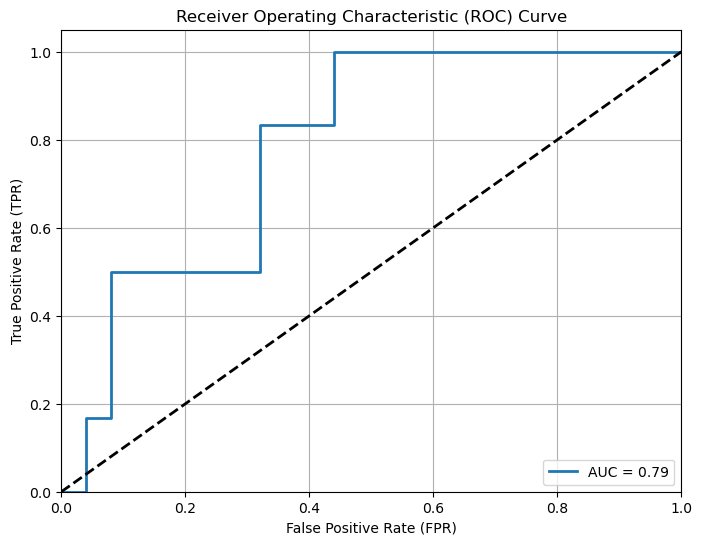

In [13]:
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test))
auc = roc_auc_score(y_test, lr.predict_proba(X_test))   

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linewidth=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()